In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/algonacci/Free-CDN/main/Beras%20RF.csv')
df

,Komoditas,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Ratarata Beras Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan,Beras,UMP,BBM Solar,quantity
0,2021-03-15,10,4000,4150,5050,9465,20,10,11200,1810351,9600,113151
1,2021-03-16,10,3850,4100,4740,9360,70,20,11200,1810351,9600,113151
2,2021-03-17,10,4160,4230,4950,9400,30,10,11200,1810351,9600,113151
3,2021-03-18,10,4120,4190,4730,9340,40,10,11200,1810351,9600,113151
4,2021-03-19,10,4190,4290,4990,9410,40,10,11200,1810351,9600,113151
...,...,...,...,...,...,...,...,...,...,...,...,...
728,2024-03-11,10,6760,7140,8330,14910,120,80,15800,2057495,6800,113151
729,2024-03-12,10,6530,6930,8260,14810,120,80,15800,2057495,6800,113151
730,2024-03-13,10,6480,6920,8240,14750,100,60,15750,2057495,6800,113151
731,2024-03-14,10,6510,7060,8240,14780,150,70,15750,2057495,6800,113151


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Komoditas                        733 non-null    object
 1   Luas Panen Padi                  733 non-null    int64 
 2   GKP Tingkat Petani               733 non-null    int64 
 3   GKP Tingkat Penggilingan         733 non-null    int64 
 4   GKG Tingkat Penggilingan         733 non-null    int64 
 5   Ratarata Beras Penggilingan      733 non-null    int64 
 6   Stok GKG Tingkat Penggilingan    733 non-null    int64 
 7   Stok Beras Tingkat Penggilingan  733 non-null    int64 
 8   Beras                            733 non-null    int64 
 9   UMP                              733 non-null    int64 
 10  BBM Solar                        733 non-null    int64 
 11  quantity                         733 non-null    int64 
dtypes: int64(11), object(1)
memory usage

In [4]:
df.drop(['quantity', 'Komoditas'], inplace=True, axis=1)
df

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Ratarata Beras Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan,Beras,UMP,BBM Solar
0,10,4000,4150,5050,9465,20,10,11200,1810351,9600
1,10,3850,4100,4740,9360,70,20,11200,1810351,9600
2,10,4160,4230,4950,9400,30,10,11200,1810351,9600
3,10,4120,4190,4730,9340,40,10,11200,1810351,9600
4,10,4190,4290,4990,9410,40,10,11200,1810351,9600
...,...,...,...,...,...,...,...,...,...,...
728,10,6760,7140,8330,14910,120,80,15800,2057495,6800
729,10,6530,6930,8260,14810,120,80,15800,2057495,6800
730,10,6480,6920,8240,14750,100,60,15750,2057495,6800
731,10,6510,7060,8240,14780,150,70,15750,2057495,6800


In [5]:
from pycaret.regression import *
s = setup(data = df, target = 'Beras', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Beras
2,Target type,Regression
3,Original data shape,"(733, 10)"
4,Transformed data shape,"(733, 10)"
5,Transformed train set shape,"(513, 10)"
6,Transformed test set shape,"(220, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [6]:
# functional API
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,24.7015,3279.1276,54.4493,0.9977,0.0043,0.0020,0.2850
rf,Random Forest Regressor,27.6078,4237.5057,59.6861,0.9971,0.0048,0.0022,0.3650
knn,K Neighbors Regressor,27.1094,4323.2805,62.7666,0.9970,0.0049,0.0021,0.0340
gbr,Gradient Boosting Regressor,32.7616,4519.2449,64.4163,0.9968,0.0052,0.0026,0.1360
catboost,CatBoost Regressor,38.3817,5773.0132,74.3230,0.9960,0.0058,0.0030,1.7390
xgboost,Extreme Gradient Boosting,34.1432,6188.7306,73.9166,0.9956,0.0059,0.0027,0.3610
lightgbm,Light Gradient Boosting Machine,43.3725,7156.6264,80.1850,0.9953,0.0062,0.0034,0.1720
dt,Decision Tree Regressor,27.2021,6562.9713,74.6936,0.9953,0.0059,0.0021,0.0230
ada,AdaBoost Regressor,90.4765,14604.1878,118.9960,0.9896,0.0100,0.0076,0.1510
ridge,Ridge Regression,92.0652,15371.7480,123.0846,0.9892,0.0097,0.0074,0.0420


In [7]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [8]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

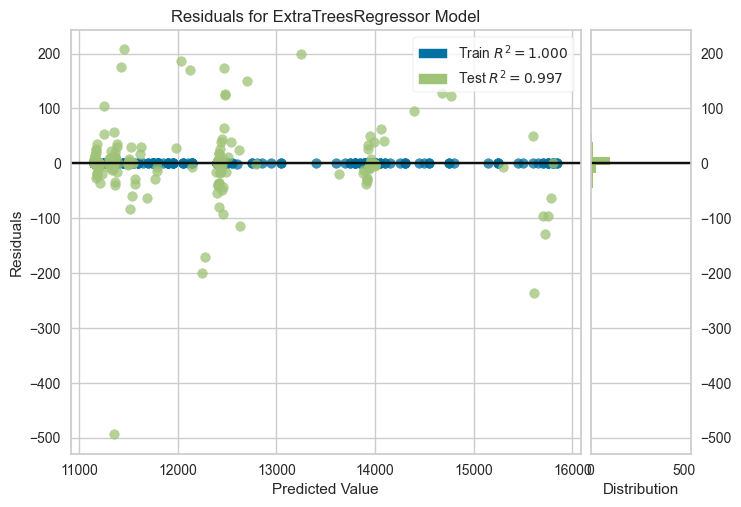

In [9]:
plot_model(best, plot = 'residuals')

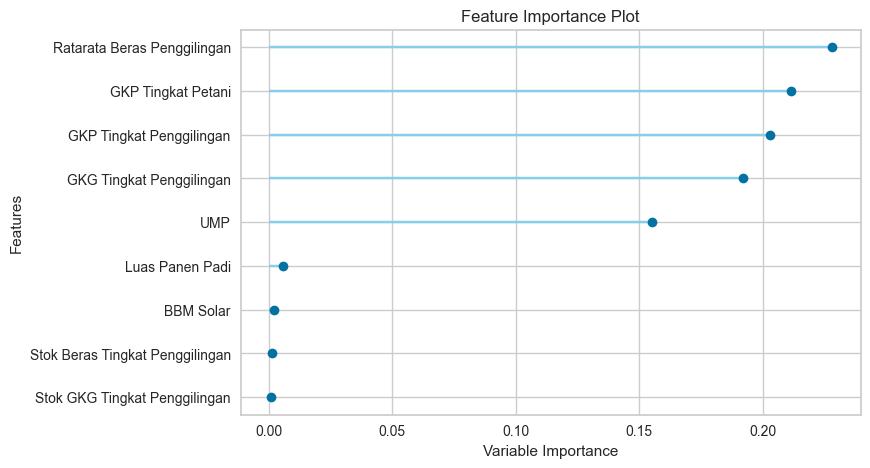

In [10]:
# functional API
plot_model(best, plot = 'feature')

In [11]:
# functional API
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,28.6795,3808.7307,61.7149,0.9973,0.0050,0.0023


,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Ratarata Beras Penggilingan,Stok GKG Tingkat Penggilingan,Stok Beras Tingkat Penggilingan,UMP,BBM Solar,Beras,prediction_label
723,0,7290,7560,8960,15355,90,50,2057495,6800,15800,15704.0
485,20,5070,5290,6220,11125,20,10,1986670,6800,12450,12396.5
91,20,4160,4400,4920,9390,60,30,1810351,11150,11150,11152.0
314,10,4300,4600,5340,9335,90,170,1841487,6800,11300,11322.5
177,70,4340,4510,5260,9535,60,30,1810351,11150,11150,11160.5
...,...,...,...,...,...,...,...,...,...,...,...
435,10,4810,5150,6260,11050,40,20,1986670,6800,11950,11978.5
22,60,3980,4260,4860,9290,60,30,1810351,9600,11200,11200.0
274,20,4170,4430,5250,9565,150,60,1841487,6800,11350,11356.5
145,10,4360,4610,5160,9340,60,30,1810351,11150,11150,11155.5


In [12]:
single_row_data = {
    'Luas Panen Padi': [50],
    'GKP Tingkat Petani': [5000],
    'GKP Tingkat Penggilingan': [5500],
    'GKG Tingkat Penggilingan': [6500],
    'Ratarata Beras Penggilingan': [11000],
    'Stok GKG Tingkat Penggilingan': [70],
    'Stok Beras Tingkat Penggilingan': [60],
    'UMP': [2100000],
    'BBM Solar': [8000],
    # Add all features your model expects
}

# Convert dictionary to DataFrame
new_data = pd.DataFrame(single_row_data)

# Step 5: Make Predictions
predictions = predict_model(best, data=new_data)

# Step 6: View Predictions
print(predictions)

   Luas Panen Padi  GKP Tingkat Petani  GKP Tingkat Penggilingan  \
0               50                5000                      5500   

   GKG Tingkat Penggilingan  Ratarata Beras Penggilingan  \
0                      6500                        11000   

   Stok GKG Tingkat Penggilingan  Stok Beras Tingkat Penggilingan      UMP  \
0                             70                               60  2100000   

   BBM Solar  prediction_label  
0       8000           12401.0  


In [14]:
single_row_data = {
    'Luas Panen Padi': [float(input("Enter Luas Panen Padi: "))],
    'GKP Tingkat Petani': [float(input("Enter GKP Tingkat Petani: "))],
    'GKP Tingkat Penggilingan': [float(input("Enter GKP Tingkat Penggilingan: "))],
    'GKG Tingkat Penggilingan': [float(input("Enter GKG Tingkat Penggilingan: "))],
    'Ratarata Beras Penggilingan': [float(input("Enter Ratarata Beras Penggilingan: "))],
    'Stok GKG Tingkat Penggilingan': [float(input("Enter Stok GKG Tingkat Penggilingan: "))],
    'Stok Beras Tingkat Penggilingan': [float(input("Enter Stok Beras Tingkat Penggilingan: "))],
    'UMP': [float(input("Enter UMP: "))],
    'BBM Solar': [float(input("Enter BBM Solar: "))],
    # Add prompts for all other features your model expects
}

# Convert dictionary to DataFrame
new_data = pd.DataFrame(single_row_data)

# Step 4: Make Predictions
predictions = predict_model(best, data=new_data)

# Step 5: View Predictions
print(predictions)

   Luas Panen Padi  GKP Tingkat Petani  GKP Tingkat Penggilingan  \
0             70.0              6000.0                    7000.0   

   GKG Tingkat Penggilingan  Ratarata Beras Penggilingan  \
0                    8500.0                      13000.0   

   Stok GKG Tingkat Penggilingan  Stok Beras Tingkat Penggilingan        UMP  \
0                           95.0                             85.0  2500000.0   

   BBM Solar  prediction_label  
0     7000.0           14177.5  
